### Aprendizado de Máquina - Árvore de Decisão
> Uma árvore de decisão representa uma função que toma como entrada um vetor de valores de atributos e retorna uma “decisão” – um valor de saída único.

> Uma árvore de decisão alcança a decisão realizando uma sequência de testes, começando na raiz e seguindo o ramo apropriado até que uma folha seja alcançada.

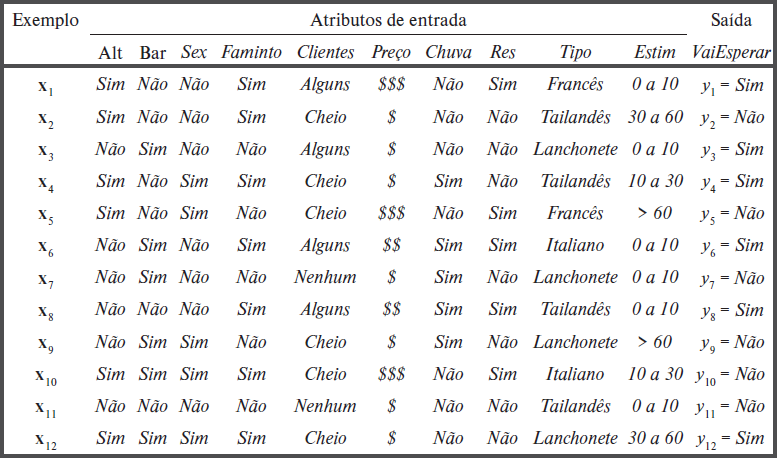

> A árvore que representa a função de decisão que SR utiliza para o problema do restaurante. Seguindo os ramos, vemos que um exemplo com Clientes = Cheio e EsperaEstimada = 0 a 10 será classificado como positivo (ou seja, sim, esperaremos por uma mesa).

> 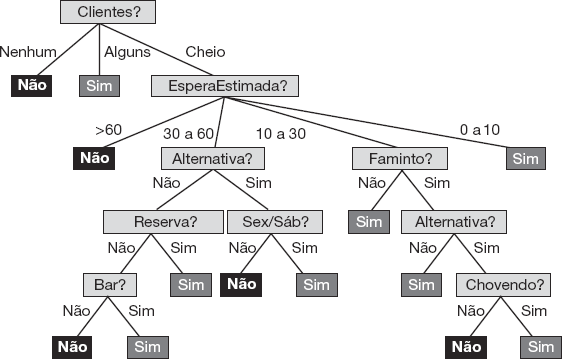

> Dessa forma, pode-se enxergar a árvore de decisão como uma representação de conjunto de regras criado para tormar qualquer decisão.

> A diversos algoritmos para a escolha das regras da arvore.

In [93]:
# Dataset de Iris
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target

In [94]:
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [95]:
iris1 = iris.loc[iris.target.isin([1,2]), ['petal length (cm)', 'petal width (cm)', 'target']]


In [96]:
iris1

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [97]:
# Separando as features e o labels
X = iris1.drop('target', axis = 1)
y = iris1.target

In [98]:
# Dividindo os dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

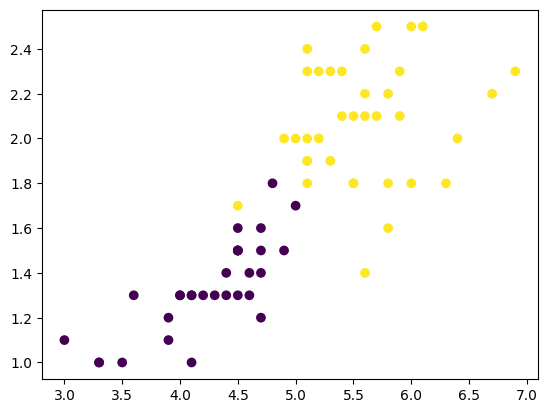

In [99]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_train['petal length (cm)'],
           X_train['petal width (cm)'],
           c=y_train
           )


In [100]:
# Arvore de decisao
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [101]:
clf.score(X_train, y_train)

1.0

[Text(0.6666666666666666, 0.9, 'x[0] <= 5.05\ngini = 0.497\nsamples = 67\nvalue = [31, 36]'),
 Text(0.5, 0.7, 'x[1] <= 1.9\ngini = 0.161\nsamples = 34\nvalue = [31, 3]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 1.65\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.5, 0.3, 'x[0] <= 4.65\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.7, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]')]

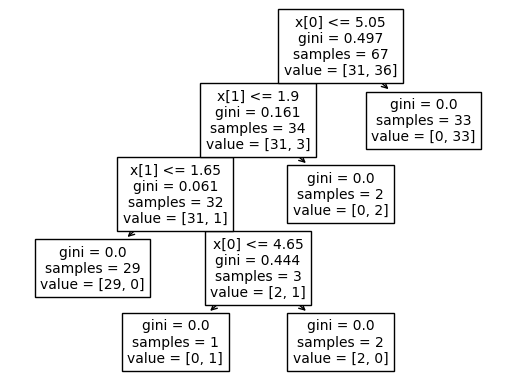

In [102]:
tree.plot_tree(clf)

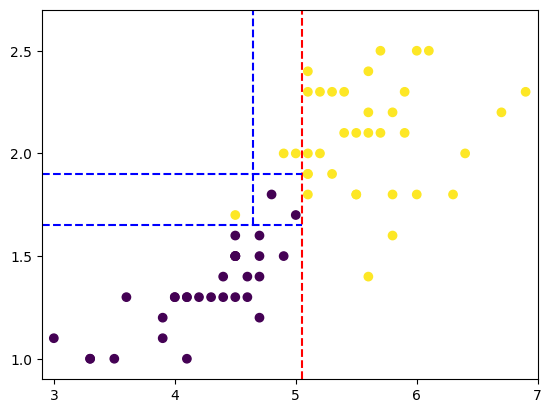

In [103]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_train['petal length (cm)'],
           X_train['petal width (cm)'],
           c=y_train
           )
ax.set(xlim=(2.9,7), xticks=[3,4,5,6,7],
       ylim=(0.9,2.7), yticks=[1,1.5,2,2.5])

ax.plot([5.05, 5.05],[0.9,2.7], '--r')
ax.plot([2.9, 5.05], [1.9,1.9], '--b')
ax.plot([2.9, 5.05], [1.65,1.65], '--b')
ax.plot([4.65, 4.65], [1.65,9], '--b')


plt.show()

In [104]:
# Para dados de teste
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
print("Matriz de Confusão : ")
confusion_matrix(y_test, y_pred)

Matriz de Confusão : 


array([[18,  1],
       [ 6,  8]])

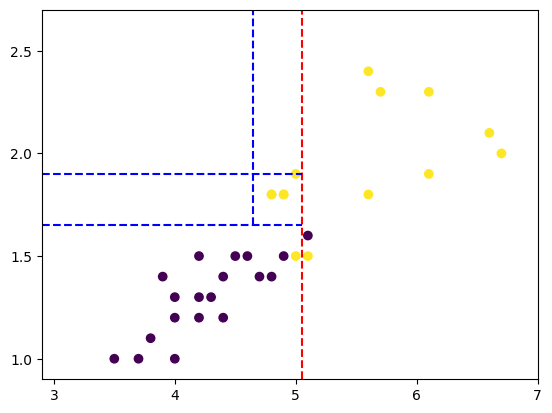

In [105]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test['petal length (cm)'],
           X_test['petal width (cm)'],
           c=y_test
           )
ax.set(xlim=(2.9,7), xticks=[3,4,5,6,7],
       ylim=(0.9,2.7), yticks=[1,1.5,2,2.5])

ax.plot([5.05, 5.05],[0.9,2.7], '--r')
ax.plot([2.9, 5.05], [1.9,1.9], '--b')
ax.plot([2.9, 5.05], [1.65,1.65], '--b')
ax.plot([4.65, 4.65], [1.65,9], '--b')


plt.show()